# 1.Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_campaign = pd.read_csv('campaign.csv')
df_customer = pd.read_csv('customer.csv')
df_device_detail = pd.read_csv('device_detail.csv')
df_status_detail = pd.read_csv('status_detail.csv')
df_ticket_history = pd.read_csv('ticket_history.csv')

# 2.Data cleaning

## 2.1 Data type, Null values, Duplicate values

### Bảng campaign

In [ ]:
#bảng campaign chứa thông tin về các chiến dịch quảng cáo
df_campaign.head()

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
# kiểm tra xem có duplicate values không
df_campaign.duplicated().sum()

np.int64(0)

### Bảng customer

In [ ]:
#bảng customer chứa thông tin về khách hàng
df_customer.head()

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
#chuyển đổi cột dob sang datetime
df_customer['dob']=pd.to_datetime(df_customer['dob'])

In [ ]:
# kiểm tra xem có duplicate values không
df_customer.duplicated().sum()

np.int64(0)

### Bảng device_detail

In [ ]:
#bảng device_detail chứa thông tin về thiết bị khách hàng sử dụng để mua vé
df_device_detail.head()

,device_number,model,platform
0,00006afbe30ae7018c92bb324cd58afc,browser,website
1,0000b0ce524ef4d66c7bfdad67a91970,devicemodel,mobile
2,0000e2a055b67fe49c06bbe28b268251,"iPhone10,2",mobile
3,00012f7a6842cca5d531b7c8b32967d6,"iPhone10,3",mobile
4,000215f1b9363b5465b8ee895fa6c920,devicemodel,mobile


In [ ]:
df_device_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
# kiểm tra tổng giá trị thiếu trong từng cột
df_device_detail.isnull().sum()

,0
device_number,1
model,7139
platform,0


In [ ]:
#thay thế giá trị thiếu trong cột model bằng 'Unknown'
df_device_detail.fillna({'model':'Unknown'}, inplace=True)

#xóa các hàng có giá trị thiếu trong cột device_number
df_device_detail.dropna(subset=['device_number'], inplace=True)

In [ ]:
df_device_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139901 entries, 0 to 139900
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          139901 non-null  object
 2   platform       139901 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


In [ ]:
# kiểm tra xem có duplicate values không
df_device_detail.duplicated().sum()

np.int64(0)

### Bảng status_detail

In [ ]:
# bảng status_detail chứa thông tin về trạng thái vé
df_status_detail.head()

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please...,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect atte...,customer


In [ ]:
df_status_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


### Bảng ticket_history

In [ ]:
#bảng ticket_history chứa thông tin về lịch sử mua vé của khách hàng
df_ticket_history.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [ ]:
df_ticket_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
# chuyển cột time sang datetime
df_ticket_history['time']=pd.to_datetime(df_ticket_history['time'])

In [ ]:
#kiểm tra xem có duplicate values không
df_ticket_history.duplicated().sum()

np.int64(102)

In [ ]:
# xóa các hàng trùng lặp
df_ticket_history.drop_duplicates(inplace=True)

## 2.2 Join table

In [ ]:
# xuất phát từ bảng ticket_history, ta sẽ join với các bảng còn lại để có được bảng dữ liệu hoàn chỉnh
df_join_campaign = pd.merge(df_ticket_history,df_campaign,how = 'left', on = 'campaign_id')
df_join_customer = pd.merge(df_join_campaign,df_customer, how= 'left', on = 'customer_id')
df_join_device = pd.merge(df_join_customer, df_device_detail, how= 'left', on = 'device_number')
df_final = pd.merge(df_join_device, df_status_detail, how= 'left', on = 'status_id')

In [ ]:
df_final.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,campaign_type,usergender,dob,model,platform,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,direct discount,Male,1989-02-25,"iPhone13,1",mobile,Order successful,NaN
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,direct discount,Male,1991-06-09,browser,website,Order successful,NaN
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,NaN,Male,1989-05-18,Unknown,mobile,Order successful,NaN
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,direct discount,Male,1997-08-31,devicemodel,mobile,Order successful,NaN
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,direct discount,Male,1988-09-20,devicemodel,mobile,Order successful,NaN


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  campaign_type   91627 non-null   object        
 13  usergender      154725 non-null  object        
 14  dob             154725 non-null  dat

In [ ]:
df_final.isnull().sum().sort_values(ascending=False)

,0
error_group,133679
campaign_type,63098
platform,78
model,78
paying_method,0
ticket_id,0
customer_id,0
theater_name,0
device_number,0
original_price,0


In [ ]:
df_final.fillna('Unknown', inplace=True)

In [ ]:
df_final.nunique().sort_values(ascending=False)

,0
ticket_id,154725
time,154725
device_number,126459
customer_id,119477
dob,11322
final_price,2715
original_price,1895
model,1215
movie_name,253
discount_value,242


# 3.Phân tích

## 3.1 Phân tích tổng quan về khách hàng

In [ ]:
df_final.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,campaign_type,usergender,dob,model,platform,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,direct discount,Male,1989-02-25,"iPhone13,1",mobile,Order successful,Unknown
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,direct discount,Male,1991-06-09,browser,website,Order successful,Unknown
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Unknown,Male,1989-05-18,Unknown,mobile,Order successful,Unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,direct discount,Male,1997-08-31,devicemodel,mobile,Order successful,Unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,direct discount,Male,1988-09-20,devicemodel,mobile,Order successful,Unknown


In [ ]:
# tính tuổi của khách hàng và tạo cột age
from datetime import datetime
current_year = datetime.now().year
df_final['age'] = current_year - df_final['dob'].dt.year

In [ ]:
# lấy danh sách khách hàng kèm giới tính và tuổi
df_cus = df_final.drop_duplicates(subset=['customer_id'])[['customer_id','usergender','age']]
df_cus.head()

,customer_id,usergender,age
0,100009,Male,36
1,100493,Male,34
2,100596,Male,36
3,100852,Male,28
4,100965,Male,37


In [ ]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119477 entries, 0 to 154724
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  119477 non-null  int64 
 1   usergender   119477 non-null  object
 2   age          119477 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 3.2+ MB


### Phân bổ KH theo độ tuổi

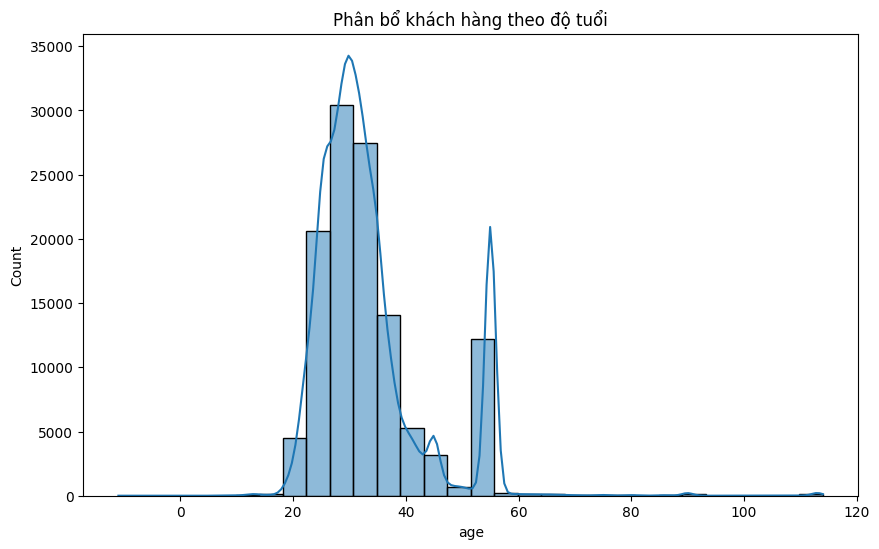

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_cus, x='age',bins=30, kde=True)
plt.title('Phân bổ khách hàng theo độ tuổi')
plt.show()


- Độ tuổi phổ biến nhất của khách hàng tập trung trong khoảng từ 20 đến khoảng 40 tuổi.
- Có một lượng lớn khách hàng ở độ tuổi 55. Điều này có thể liên quan đến những khách hàng chưa xác thực thông tin nên tuổi được điền mặc định là 55.
- Số lượng khách hàng giảm đáng kể ở các độ tuổi trẻ hơn (dưới 20) và lớn tuổi hơn (trên 60).

### Phân bổ KH theo giới tính

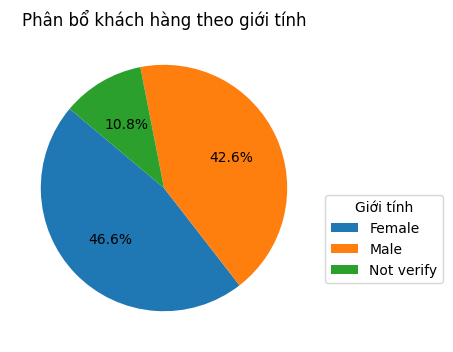

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df_cus['usergender'].value_counts(),
        autopct='%1.1f%%',
         startangle=140)
plt.title('Phân bổ khách hàng theo giới tính')
plt.legend(df_cus['usergender'].value_counts().index,
          title='Giới tính',
          bbox_to_anchor=(1, 0.5),
          loc='best')
plt.show()

Biểu đồ tròn này cho thấy phân bổ khách hàng theo giới tính. Có thể thấy tỷ lệ nam và nữ khá đồng đều, với nam chiếm 51.5% và nữ chiếm 37.7%. Tuy nhiên, có một tỷ lệ đáng kể (10.8%) khách hàng chưa xác thực giới tính.

### Phân bổ KH theo độ tuổi và giới tính

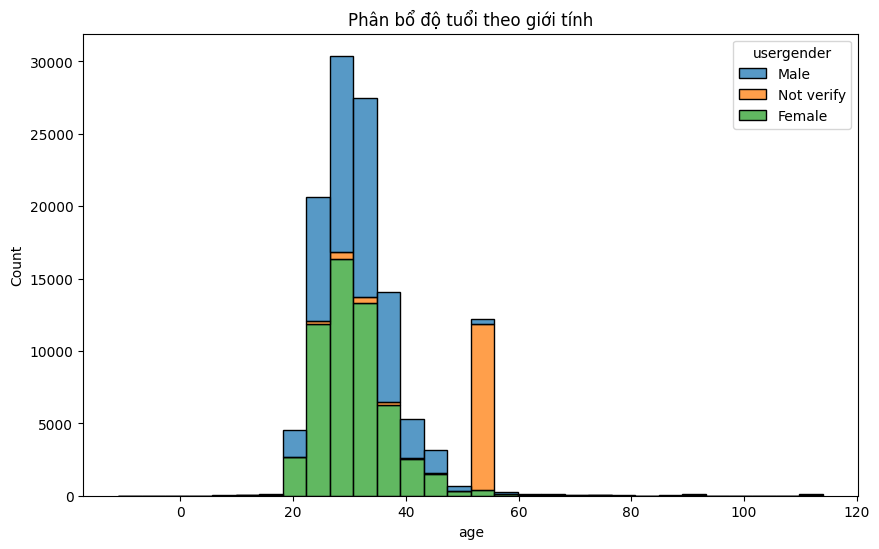

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_cus, x='age', hue='usergender', bins=30, multiple='stack')
plt.title('Phân bổ độ tuổi theo giới tính')
plt.show()

- Nhóm khách hàng "Not verify" (chưa xác thực) tập trung chủ yếu ở độ tuổi 55. Điều này củng cố nhận định trước đó rằng tuổi 55 có thể là giá trị mặc định cho những tài khoản chưa hoàn chỉnh thông tin.
- Trong nhóm khách hàng đã xác thực giới tính (Male và Female), phân bổ độ tuổi có vẻ tương đồng nhau, với phần lớn khách hàng nằm trong độ tuổi từ 20 đến 40.
- Số lượng khách hàng nam và nữ đã xác thực giới tính khá cân bằng trong hầu hết các nhóm tuổi.

### Phân loại khách hàng theo thế hệ(baby boombers,genX, genY, genZ)

In [ ]:
df_cus['age_generation'] = df_final['dob'].apply(lambda x: 'baby boombers' if x.year < 1965 else 'Gen X' if x.year < 1981 else 'Gen Y' if x.year < 1997 else 'Gen Z')

In [ ]:
df_gen=df_cus[df_cus['usergender']!='Not verify'].groupby('age_generation').agg(total=('customer_id','count')).sort_values(by='total',ascending=False)
df_gen

,total
age_generation,
Gen Y,63310
Gen Z,38401
Gen X,4261
baby boombers,590


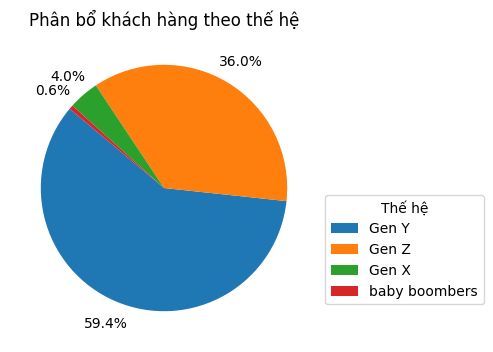

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df_gen['total'], autopct='%1.1f%%',startangle=140,pctdistance=1.2)
plt.title('Phân bổ khách hàng theo thế hệ')
plt.legend(df_gen.index, title='Thế hệ',bbox_to_anchor=(1, 0.5), loc='best')
plt.show()

- Thế hệ Gen Y chiếm tỷ lệ lớn nhất, tiếp theo là Gen Z. Điều này phù hợp với phân tích độ tuổi trước đó, cho thấy phần lớn khách hàng nằm trong độ tuổi từ 20 đến 40.
- Các thế hệ Gen X và baby boomers chiếm tỷ lệ nhỏ hơn đáng kể.
- Điều này khẳng định đối tượng khách hàng chính là những người trẻ thế hệ Gen Y và Gen Z.

### Phân tích chi tiêu của các thế hệ

In [ ]:
df_final_with_gen = pd.merge(df_final, df_cus[['customer_id', 'age_generation']], on='customer_id', how='left')

df_success_gen = df_final_with_gen[(df_final_with_gen['status_id'] == 1) & (df_final_with_gen['usergender'] != 'Not verify')]

df_revenue_by_gen = df_success_gen.groupby('age_generation').agg(
    total_revenue=('final_price', 'sum'),
    average_revenue=('final_price', 'mean')
).reset_index().sort_values(by='total_revenue', ascending=False)

df_revenue_by_gen

,age_generation,total_revenue,average_revenue
1,Gen Y,603014.13,8.075505
2,Gen Z,293863.32,7.380533
0,Gen X,38332.28,8.213473
3,baby boombers,5198.75,7.912861


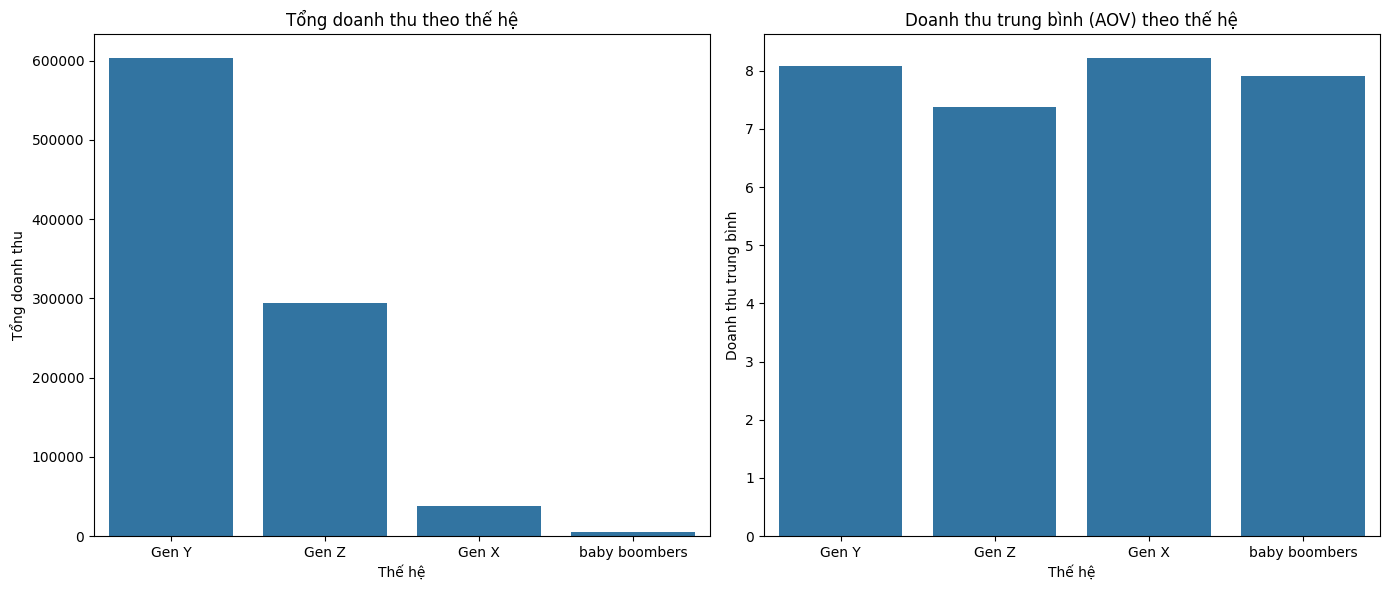

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# biểu đồ tổng doanh thu
sns.barplot(data=df_revenue_by_gen, x='age_generation', y='total_revenue', ax=ax[0])
ax[0].set_title('Tổng doanh thu theo thế hệ')
ax[0].set_xlabel('Thế hệ')
ax[0].set_ylabel('Tổng doanh thu')

# biểu đồ doanh thu trung bình (AOV)
sns.barplot(data=df_revenue_by_gen, x='age_generation', y='average_revenue', ax=ax[1])
ax[1].set_title('Doanh thu trung bình (AOV) theo thế hệ')
ax[1].set_xlabel('Thế hệ')
ax[1].set_ylabel('Doanh thu trung bình')

plt.tight_layout()
plt.show()

- **Tổng doanh thu:** Thế hệ Gen Y đóng góp tổng doanh thu cao nhất, theo sau là Gen Z. Điều này phù hợp với phân bổ số lượng khách hàng theo thế hệ mà chúng ta đã phân tích trước đó (Gen Y và Gen Z chiếm tỷ lệ lớn nhất).
- **Doanh thu trung bình (AOV)**: Mặc dù tổng doanh thu của Gen Y và Gen Z cao, nhưng doanh thu trung bình trên mỗi giao dịch (AOV) của các thế hệ không có sự chênh lệch quá lớn. Gen X có AOV cao nhất một chút, sau đó đến Gen Y và Baby Boomers, cuối cùng là Gen Z. Điều này gợi ý rằng Gen Y và Gen Z mua nhiều vé hơn, nhưng giá trị trung bình của mỗi lần mua không khác biệt đáng kể so với các thế hệ khác.
- **Kết luận**: Gen Y và Gen Z là hai thế hệ mang lại doanh thu chính, chủ yếu do số lượng khách hàng đông đảo. AOV khá đồng đều giữa các thế hệ.

## 3.2 Phân tích thời gian mua vé của KH

In [ ]:
# tách tháng, ngày, giờ từ cột time
df_final['month'] = df_final['time'].dt.month
df_final['day_name'] = df_final['time'].dt.day_name()
df_final['hour'] = df_final['time'].dt.hour

In [ ]:
df_final.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,usergender,dob,model,platform,description,error_group,age,month,day_name,hour
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,Male,1989-02-25,"iPhone13,1",mobile,Order successful,Unknown,36,7,Friday,17
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,Male,1991-06-09,browser,website,Order successful,Unknown,34,7,Friday,20
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,...,Male,1989-05-18,Unknown,mobile,Order successful,Unknown,36,7,Saturday,11
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,...,Male,1997-08-31,devicemodel,mobile,Order successful,Unknown,28,7,Monday,22
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,...,Male,1988-09-20,devicemodel,mobile,Order successful,Unknown,37,7,Sunday,18


### Số vé bán ra theo tháng

In [ ]:
df_month = df_final.groupby('month').agg(total_tickets=('ticket_id','count')).sort_values(by='month').reset_index()
df_month

,month,total_tickets
0,1,5009
1,2,7161
2,3,12163
3,4,12162
4,5,17927
5,6,13038
6,7,21851
7,8,11117
8,9,11761
9,10,16592


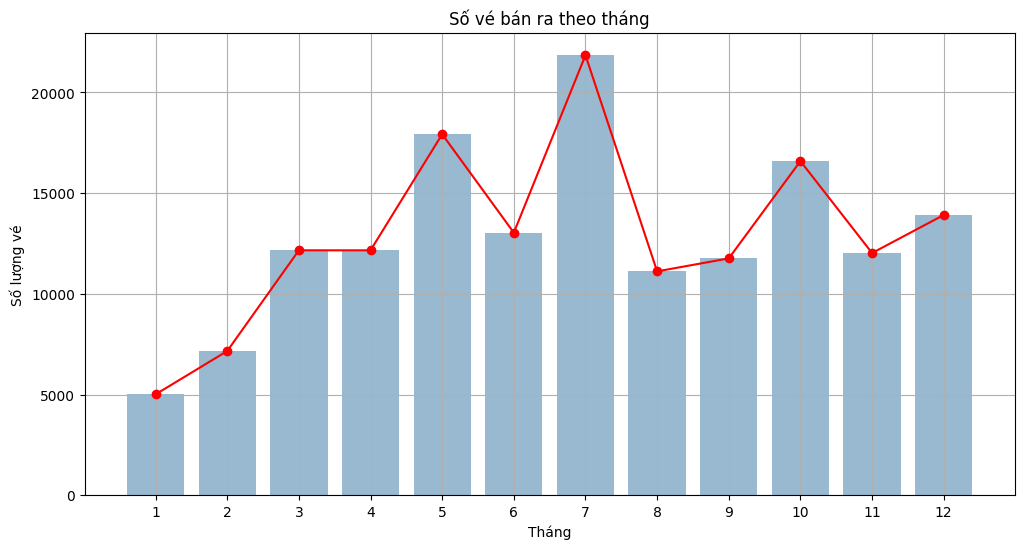

In [ ]:
# trực quan hóa số vé bán ra theo tháng
fig, ax = plt.subplots(figsize=(12,6))
# Vẽ barplot
sns.barplot(data=df_month, x='month', y='total_tickets', alpha=0.5, ax=ax)
# Vẽ lineplot
plt.plot(df_month.index, df_month['total_tickets'], color='red', marker='o')
plt.title('Số vé bán ra theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng vé')
plt.grid()
plt.xticks(range(len(df_month)), df_month['month'])
plt.show()

- Số lượng vé bán ra có xu hướng tăng từ đầu năm đến tháng 7, đạt đỉnh vào tháng 7.
- Sau tháng 7, số lượng vé bán ra có xu hướng giảm dần đến tháng 11, sau đó tăng nhẹ trở lại vào tháng 12.
- Tháng 7 là tháng có số lượng vé bán ra cao nhất, có thể do các yếu tố như mùa phim hè hoặc các chiến dịch khuyến mãi đặc biệt trong tháng này.
- Tháng 1 là tháng có số lượng vé bán ra thấp nhất.

### Số vé bán ra theo ngày trong tuần

In [ ]:
df_day = df_final.groupby('day_name').agg(total_tickets=('ticket_id','count')).reset_index()
# sắp xếp thứ tự các ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day['day_name'] = pd.Categorical(df_day['day_name'], categories=day_order, ordered=True)
df_day = df_day.sort_values('day_name')
df_day

,day_name,total_tickets
1,Monday,16702
5,Tuesday,14793
6,Wednesday,16281
4,Thursday,19101
0,Friday,26438
2,Saturday,34450
3,Sunday,26960


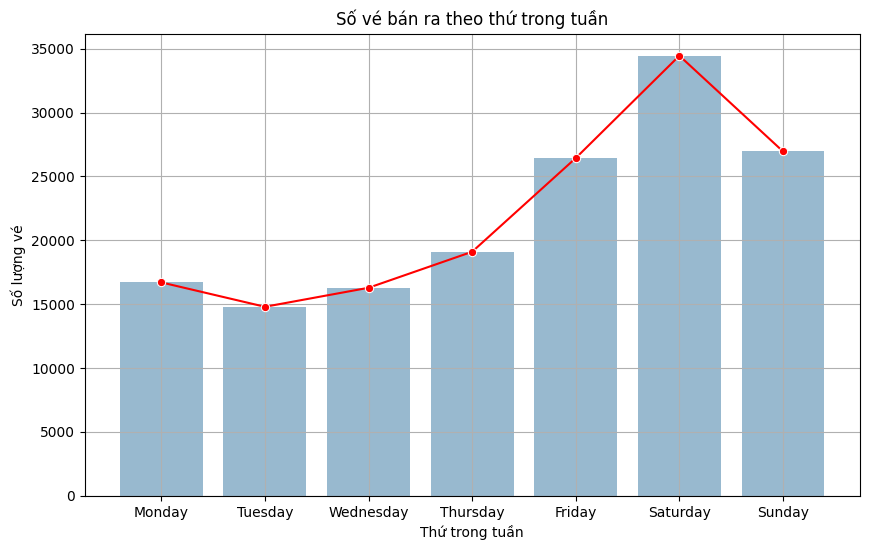

In [ ]:
# trực quan hóa số vé bán ra theo ngày trong tuần
fig, ax = plt.subplots(figsize=(10,6))
# Vẽ barplot
sns.barplot(data=df_day, x='day_name', y='total_tickets', alpha=0.5, ax=ax)

# Vẽ lineplot
sns.lineplot(data=df_day, x='day_name', y='total_tickets', color='red', marker='o')

plt.title('Số vé bán ra theo thứ trong tuần')
plt.xlabel('Thứ trong tuần')
plt.ylabel('Số lượng vé')
plt.grid(True)
plt.show()

- Số lượng vé bán ra thấp nhất vào giữa tuần (thứ Ba và thứ Tư).
- Số lượng vé bắt đầu tăng từ thứ Năm.
- Số lượng vé bán ra cao nhất vào cuối tuần, đặc biệt là thứ Bảy.

### Số vé bán ra theo giờ trong ngày

In [ ]:
df_hour = df_final.groupby('hour').agg(total_tickets=('ticket_id','count')).sort_values(by='hour').reset_index()
df_hour

,hour,total_tickets
0,0,2352
1,1,964
2,2,398
3,3,159
4,4,74
5,5,146
6,6,536
7,7,1473
8,8,3865
9,9,7111


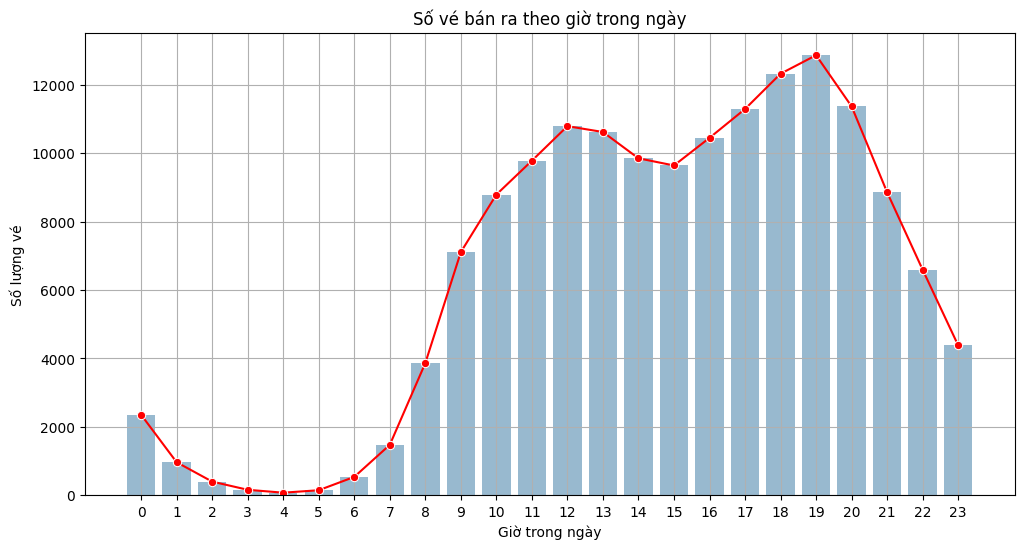

In [ ]:
# trực quan hóa số vé bán ra theo giờ trong ngày
fig, ax = plt.subplots(figsize=(12,6))
# Vẽ barplot
sns.barplot(data=df_hour, x='hour', y='total_tickets', alpha=0.5, ax=ax)
# Vẽ lineplot
sns.lineplot(data=df_hour, x='hour', y='total_tickets', color='red', marker='o', ax=ax)
plt.title('Số vé bán ra theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng vé')
plt.grid()
plt.show()


- Số lượng vé bán ra thấp nhất vào các giờ sáng sớm (khoảng từ 1 giờ đến 6 giờ).
- Số lượng vé bắt đầu tăng dần từ sáng và đạt đỉnh vào khoảng thời gian từ 18h đến 20h (6 giờ tối đến 8 giờ tối).
- Sau 20h, số lượng vé bán ra có xu hướng giảm dần đến nửa đêm.

## 3.3 Phân tích các yêu tố liên quan đến quá trình đặt vé

In [ ]:
df_final.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,usergender,dob,model,platform,description,error_group,age,month,day_name,hour
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,Male,1989-02-25,"iPhone13,1",mobile,Order successful,Unknown,36,7,Friday,17
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,Male,1991-06-09,browser,website,Order successful,Unknown,34,7,Friday,20
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,...,Male,1989-05-18,Unknown,mobile,Order successful,Unknown,36,7,Saturday,11
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,...,Male,1997-08-31,devicemodel,mobile,Order successful,Unknown,28,7,Monday,22
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,...,Male,1988-09-20,devicemodel,mobile,Order successful,Unknown,37,7,Sunday,18


### Nền tảng đặt vé

In [ ]:
df_final['platform'].value_counts()

,count
platform,
mobile,138136
website,16511
Unknown,78


In [ ]:
df_platform = df_final[df_final['platform']!='Unknown'].groupby('platform').agg(total_tickets=('ticket_id','count')).sort_values(by='total_tickets', ascending=False).reset_index()
df_platform

,platform,total_tickets
0,mobile,138136
1,website,16511


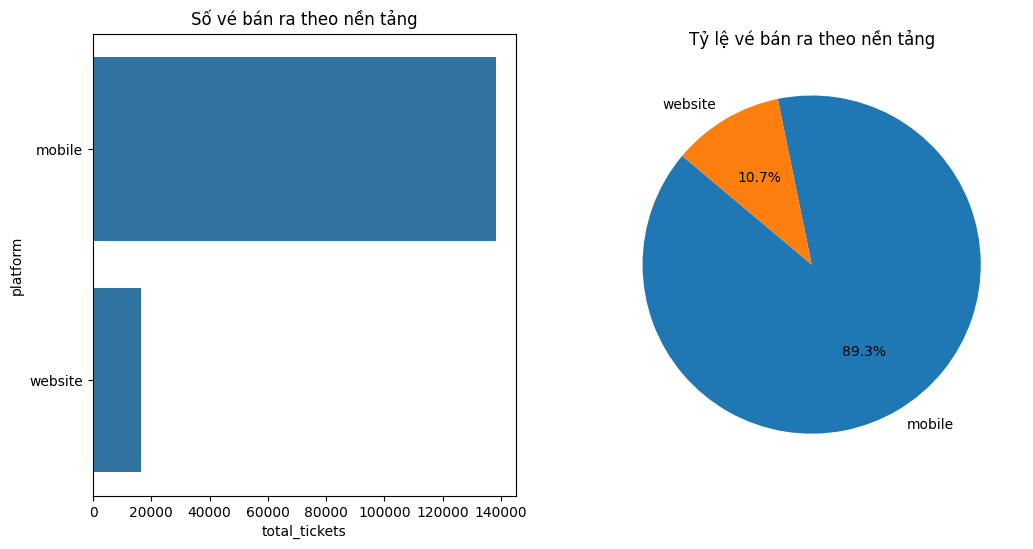

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df_platform, y='platform', x='total_tickets', ax=ax[0])
ax[0].set_title('Số vé bán ra theo nền tảng')

ax[1].pie(df_platform['total_tickets'], labels=df_platform['platform'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Tỷ lệ vé bán ra theo nền tảng')
plt.show()

- Số lượng vé bán ra qua nền tảng mobile áp đảo hoàn toàn so với nền tảng website.
- Tỷ lệ vé bán ra trên mobile chiếm tới 89.3%, trong khi website chỉ chiếm 10.7%.
- Điều này cho thấy phần lớn khách hàng ưa chuộng việc đặt vé qua thiết bị di động. Việc tối ưu trải nghiệm người dùng trên ứng dụng mobile là rất quan trọng để duy trì và tăng trưởng doanh số.

### Thiết bị đặt vé

In [ ]:
df_final['model'].value_counts().head(10)

,count
model,
devicemodel,61867
browser,13377
Unknown,6987
"iPhone11,6",6119
"iPhone9,4",4172
"iPhone9,2",3681
"iPhone10,6",3345
"iPhone12,5",3106
"iPhone8,1",3001


In [ ]:
df_final['os']=df_final['model'].apply(lambda x: 'iOS' if 'iPhone' in x or 'iPad' in x else 'Android' if 'Samsung' in x or 'Huawei' in x or 'Xiaomi' in x or 'Oppo' in x or 'Vivo' in x else 'Other')
df_final['os'].value_counts()

,count
os,
Other,87881
iOS,51558
Android,15286


In [ ]:
df_os = df_final.groupby('os').agg(total_tickets=('ticket_id','count')).sort_values(by='total_tickets', ascending=False).reset_index()
df_os

,os,total_tickets
0,Other,87881
1,iOS,51558
2,Android,15286


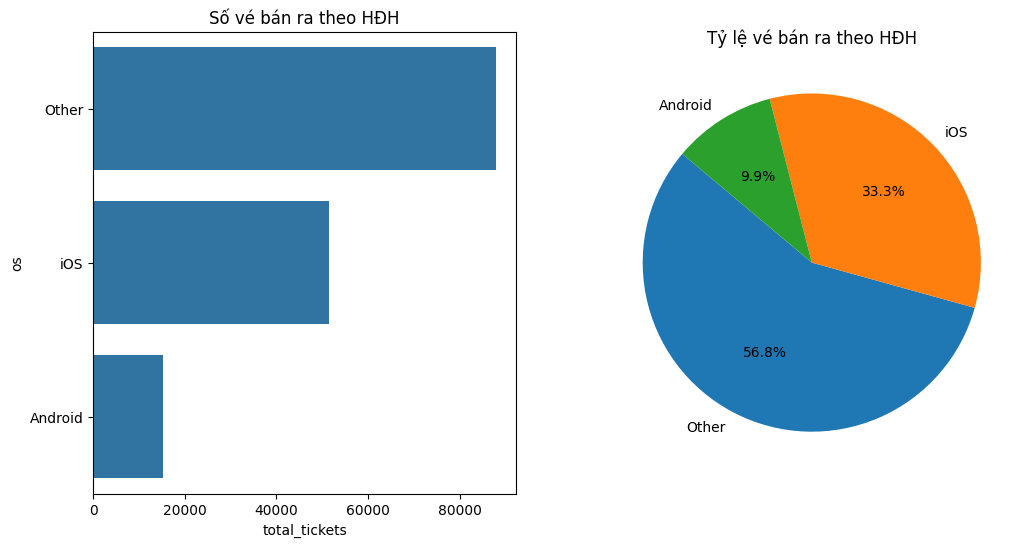

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df_os, y='os', x='total_tickets', ax=ax[0])
ax[0].set_title('Số vé bán ra theo HĐH')

ax[1].pie(df_os['total_tickets'], labels=df_os['os'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Tỷ lệ vé bán ra theo HĐH')
plt.show()

Trong các hệ điều hành di động, iOS có số lượng vé bán ra cao hơn đáng kể so với Android.

### Phương thức thanh toán

In [ ]:
df_final['paying_method'].value_counts()

,count
paying_method,
money in app,66580
bank account,52643
credit card,19820
debit card,15680
other,2


In [ ]:
df_payment = df_final[df_final['paying_method']!='other'].groupby('paying_method').agg(total_tickets=('ticket_id','count')).sort_values(by='total_tickets', ascending=False).reset_index()
df_payment

,paying_method,total_tickets
0,money in app,66580
1,bank account,52643
2,credit card,19820
3,debit card,15680


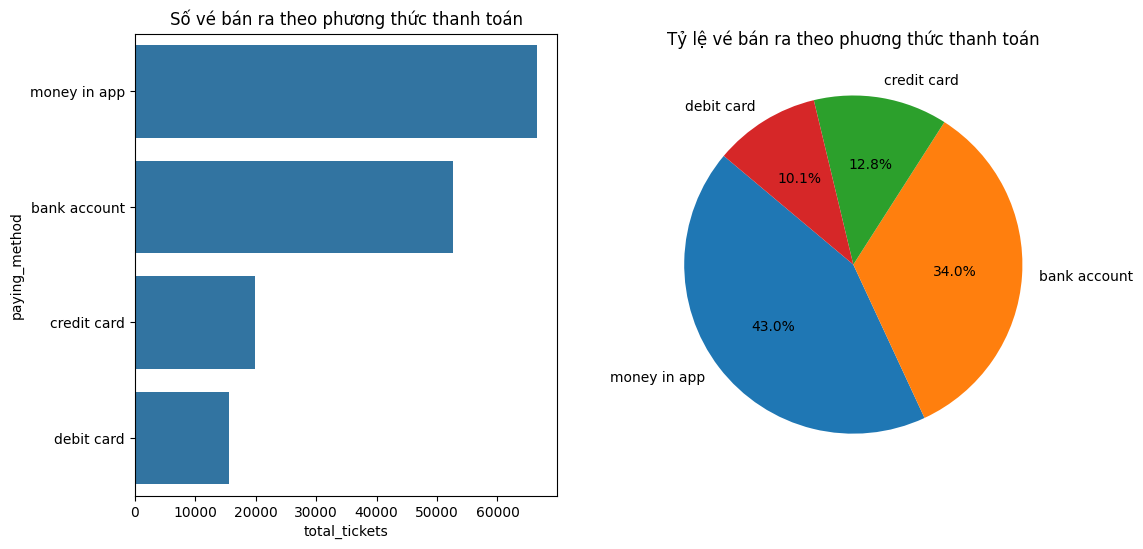

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=df_payment, y='paying_method', x='total_tickets', ax=ax[0])
ax[0].set_title('Số vé bán ra theo phương thức thanh toán')

ax[1].pie(df_payment['total_tickets'], labels=df_payment['paying_method'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Tỷ lệ vé bán ra theo phuơng thức thanh toán')
plt.show()

- Money in app" là phương thức thanh toán phổ biến nhất, chiếm tỷ lệ lớn nhất trong tổng số vé bán ra.
- "Bank account" đứng thứ hai về mức độ phổ biến, theo sau là "credit card" và "debit card".
- Những thông tin này cho thấy khách hàng chủ yếu ưa chuộng thanh toán qua "money in app" và "bank account". Việc đảm bảo các phương thức này hoạt động trơn tru và có các ưu đãi phù hợp có thể giúp tăng doanh số.

### Khuyến mãi

In [ ]:
df_final['campaign_type'].value_counts()

,count
campaign_type,
direct discount,79829
Unknown,63098
voucher,7619
reward point,4179


In [ ]:
df_final['promotion']=df_final['campaign_type'].apply(lambda x: 'non_promotion' if x=='Unknown' else 'promotion')
df_final['promotion'].value_counts()

,count
promotion,
promotion,91627
non_promotion,63098


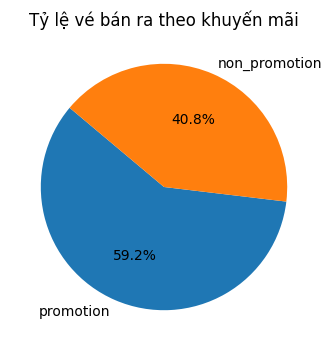

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df_final['promotion'].value_counts(),labels=df_final['promotion'].unique() ,autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ vé bán ra theo khuyến mãi')
plt.show()

In [ ]:
# biều đồ vé bán ra theo tháng và khuyến mãi
df_promo_month = df_final.groupby(['month','promotion']).agg(total_tickets=('ticket_id','count')).reset_index()
df_promo_month

,month,promotion,total_tickets
0,1,non_promotion,2459
1,1,promotion,2550
2,2,non_promotion,3337
3,2,promotion,3824
4,3,non_promotion,5685
5,3,promotion,6478
6,4,non_promotion,4819
7,4,promotion,7343
8,5,non_promotion,4901
9,5,promotion,13026


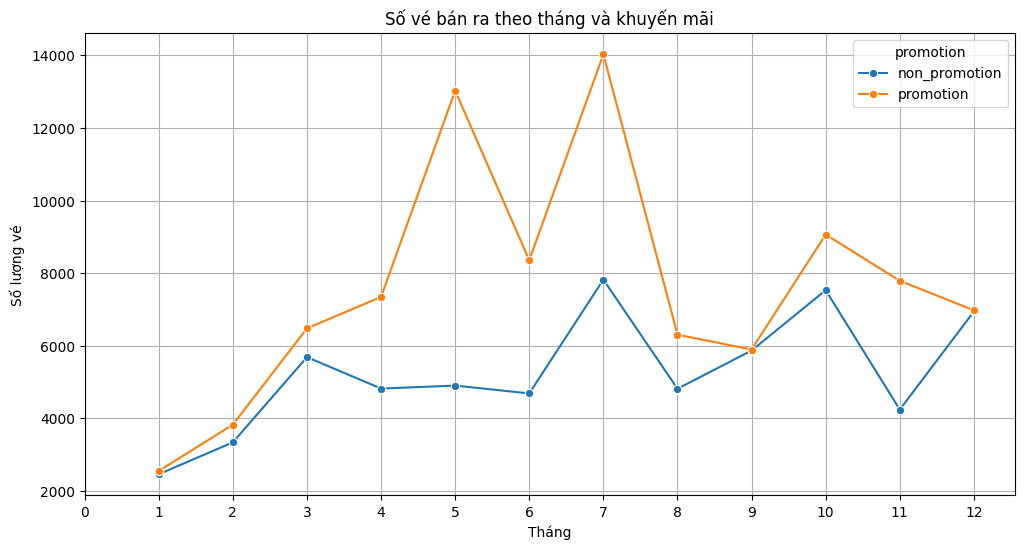

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df_promo_month,
            x='month',
            y='total_tickets',
            hue='promotion',
            marker='o')

plt.title('Số vé bán ra theo tháng và khuyến mãi')
plt.xlabel('Tháng')
plt.ylabel('Số lượng vé')
plt.grid()
plt.legend(title='promotion')

# Đặt lại ticks cho trục x
plt.xticks(range(13))
plt.show()

- Cả số lượng vé bán ra có khuyến mãi và không có khuyến mãi đều có xu hướng tăng từ đầu năm và đạt đỉnh vào tháng 7.
- Trong suốt các tháng, số lượng vé bán ra có khuyến mãi luôn cao hơn đáng kể so với số vé bán ra không có khuyến mãi. Điều này khẳng định tầm quan trọng của các chương trình khuyến mãi trong việc thúc đẩy doanh số.
- Sự sụt giảm số vé sau tháng 7 xảy ra ở cả hai nhóm, nhưng mức độ sụt giảm có vẻ tương đồng nhau.
- Biểu đồ này nhấn mạnh vai trò quan trọng của khuyến mãi trong việc thu hút khách hàng và tạo ra doanh số.

### Phim mà khách hàng xem

In [ ]:
df_final['movie_name'].value_counts().head(10)

,count
movie_name,
Doctor Strange In The Multiverse Of Madness,10044
Minions: The Rise Of Gru,8207
Avatar: The Way Of Water,6352
Thor: Love And Thunder,6346
Peninsula,6036
Black Panther 2: Wakanda Forever,4222
Avengers: Endgame,4052
Dad I'm Sorry,3571
Black Adam,3530


In [ ]:
df_movie = df_final[df_final['status_id']==1].groupby('movie_name').agg(total_tickets=('ticket_id','count'),total_customers=('customer_id','nunique'),total_revenue=('final_price','sum')).reset_index()
df_movie.head()

,movie_name,total_tickets,total_customers,total_revenue
0,13rd Sister,92,91,647.89
1,13rd Sister: Three Deadly Days,390,385,2788.28
2,1990,158,155,1429.89
3,2037,748,733,5302.23
4,30 Chua Phai Tet,106,104,1418.84


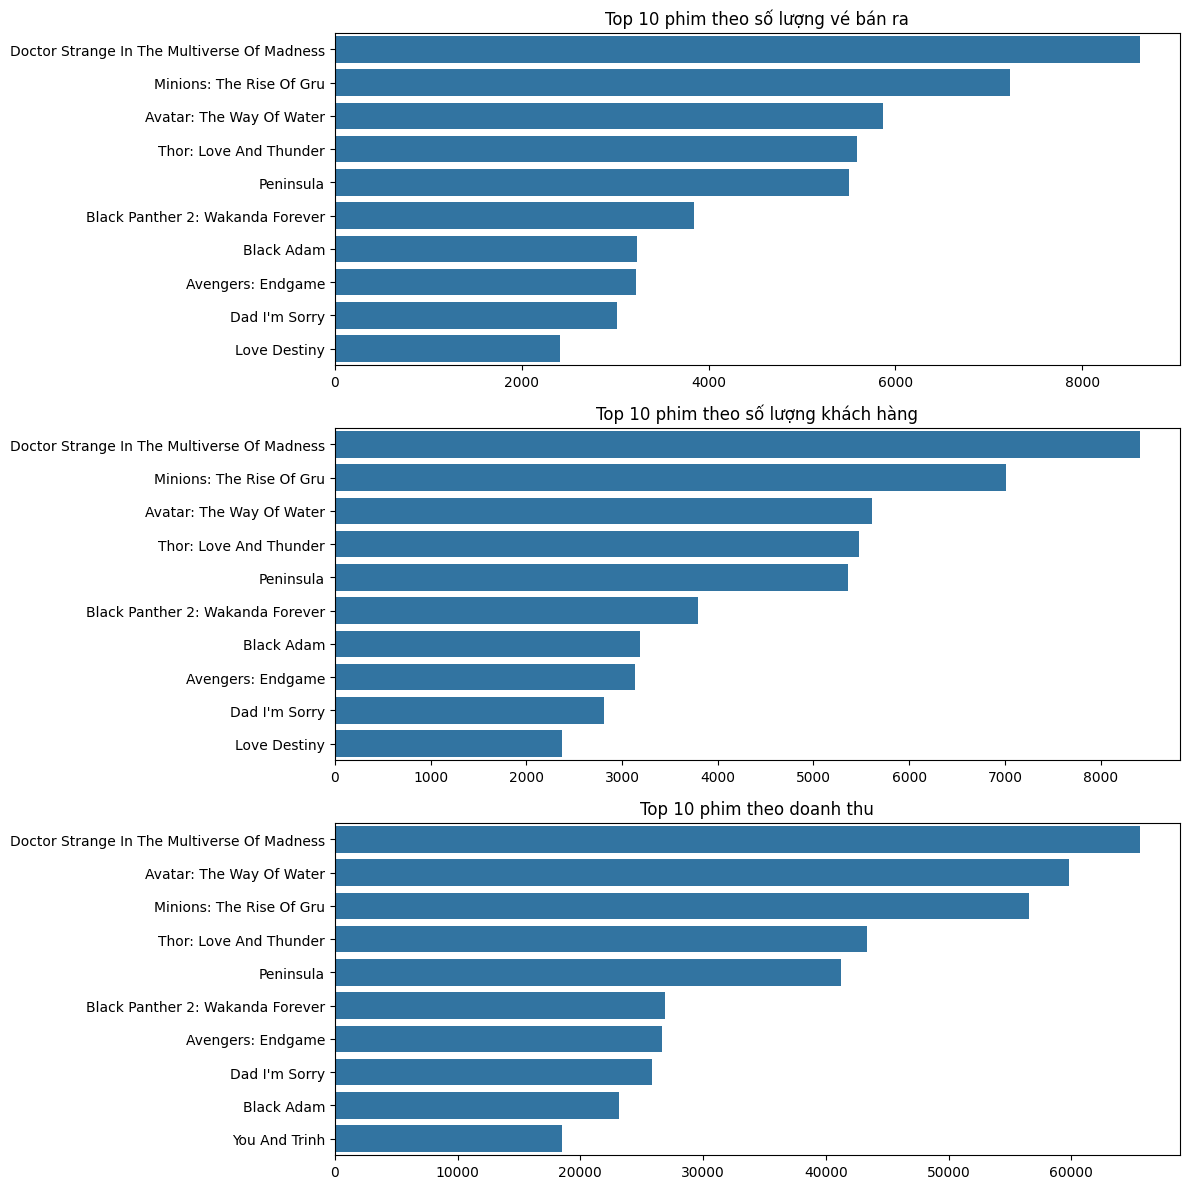

In [ ]:
# Tạo subplot với 3 biểu đồ ngang
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Vẽ số lượng vé
sns.barplot(data=df_movie.sort_values(by='total_tickets',ascending=False).head(10), y='movie_name', x='total_tickets', ax=axes[0])
axes[0].set_title('Top 10 phim theo số lượng vé bán ra')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Vẽ số lượng khách
sns.barplot(data=df_movie.sort_values(by='total_customers',ascending=False).head(10), y='movie_name', x='total_customers', ax=axes[1])
axes[1].set_title('Top 10 phim theo số lượng khách hàng')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Vẽ doanh thu
sns.barplot(data=df_movie.sort_values(by='total_revenue',ascending=False).head(10), y='movie_name', x='total_revenue', ax=axes[2])
axes[2].set_title('Top 10 phim theo doanh thu')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

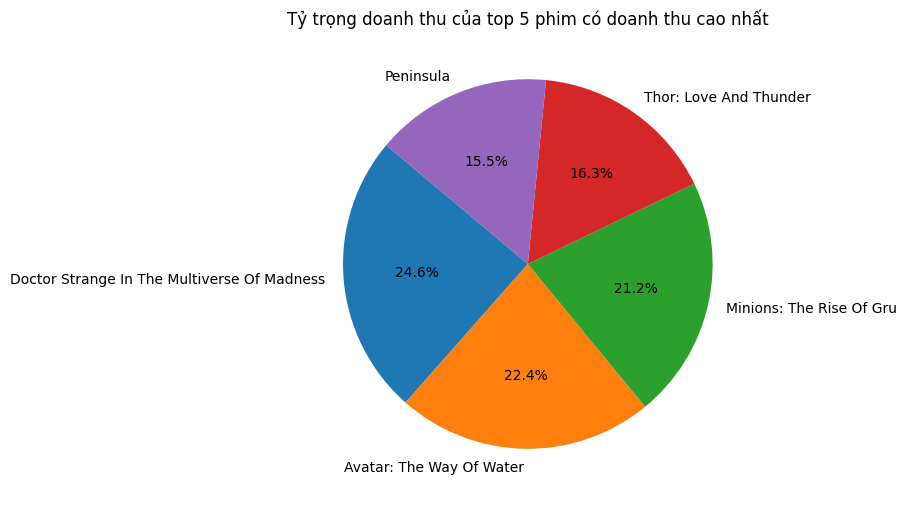

In [ ]:
# tỷ trọng doanh thu của top 5 phim có doanh thu cao nhất
top5_movies = df_movie.sort_values(by='total_revenue', ascending=False).head()
plt.figure(figsize=(8,6))
plt.pie(top5_movies['total_revenue'], labels=top5_movies['movie_name'], autopct='%1.1f%%', startangle=140)
plt.title('Tỷ trọng doanh thu của top 5 phim có doanh thu cao nhất')
plt.show()

## 3.4 Phân tích giá trị khách hàng đem lại

Phân tích các chỉ số mà 1 KH đem lại:
- tổng số vé mua
- tổng doanh thu
- giá trị đơn hàng trung bình (AOV) trên mỗi khách hàng

In [ ]:
# tính chỉ số cho những vé thanh toán thành công
df_succcess = (
    df_final[df_final['status_id']==1].groupby('customer_id').agg(
        total_tickets=('ticket_id','count'),
        total_revenue=('final_price','sum'),
        aov=('final_price','mean')
    ).reset_index()
)
df_succcess

,customer_id,total_tickets,total_revenue,aov
0,100001,1,5.36,5.360000
1,100003,6,58.39,9.731667
2,100004,1,32.25,32.250000
3,100005,1,7.43,7.430000
4,100006,1,12.37,12.370000
...,...,...,...,...
105771,231393,1,12.74,12.740000
105772,231395,1,3.26,3.260000
105773,231397,1,9.07,9.070000
105774,231398,1,10.68,10.680000


In [ ]:
df_succcess.iloc[:,1:].describe().round(2)

,total_tickets,total_revenue,aov
count,105776.00,105776.00,105776.00
mean,1.26,9.76,7.66
std,1.38,10.61,5.11
min,1.00,0.04,0.04
25%,1.00,4.54,4.12
50%,1.00,7.46,6.52
75%,1.00,11.84,9.90
max,260.00,1287.87,86.60


- **Tổng số vé mua (total_tickets)**: Trung bình mỗi khách hàng mua khoảng 1.26 vé. Giá trị trung vị (50%) là 1 vé, cho thấy phần lớn khách hàng chỉ mua 1 vé. Tuy nhiên, có một số khách hàng mua rất nhiều vé (max lên tới 260 vé), làm tăng giá trị trung bình.
- **Tổng doanh thu (total_revenue)**: Trung bình mỗi khách hàng mang về doanh thu khoảng 9.76. Tương tự như số vé, giá trị trung vị thấp hơn (7.46), phản ánh việc đa số khách hàng có tổng chi tiêu thấp, trong khi một số ít khách hàng có tổng chi tiêu rất cao (max lên tới 1287.87).
- **AOV (aov)**: Giá trị đơn hàng trung bình trên mỗi khách hàng là khoảng 7.66. Giá trị trung vị (6.52) gần với giá trị trung bình, cho thấy AOV khá đồng đều giữa các giao dịch của đa số khách hàng. Có một số giao dịch có AOV rất cao (max 86.60).
- Nhìn chung, dữ liệu cho thấy một lượng lớn khách hàng chỉ mua một vé và có tổng chi tiêu thấp. Tuy nhiên, cũng có một nhóm nhỏ khách hàng rất tích cực mua sắm và đóng góp doanh thu đáng kể.

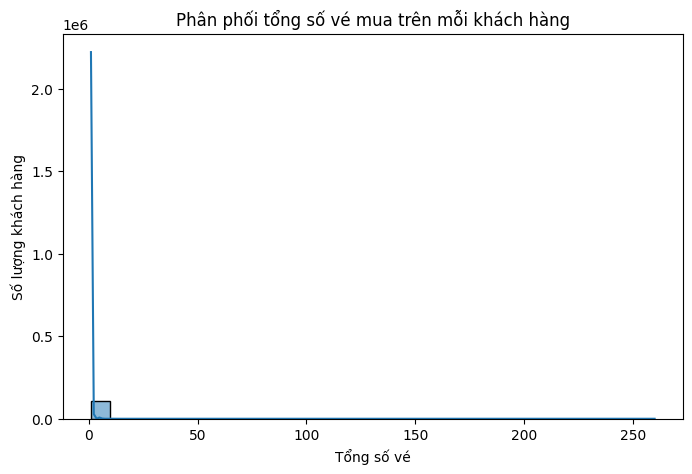

In [ ]:
# Trực quan hóa phân phối của tổng số vé mua
plt.figure(figsize=(8, 5))
sns.histplot(data=df_succcess, x='total_tickets', bins=30, kde=True)
plt.title('Phân phối tổng số vé mua trên mỗi khách hàng')
plt.xlabel('Tổng số vé')
plt.ylabel('Số lượng khách hàng')
plt.show()

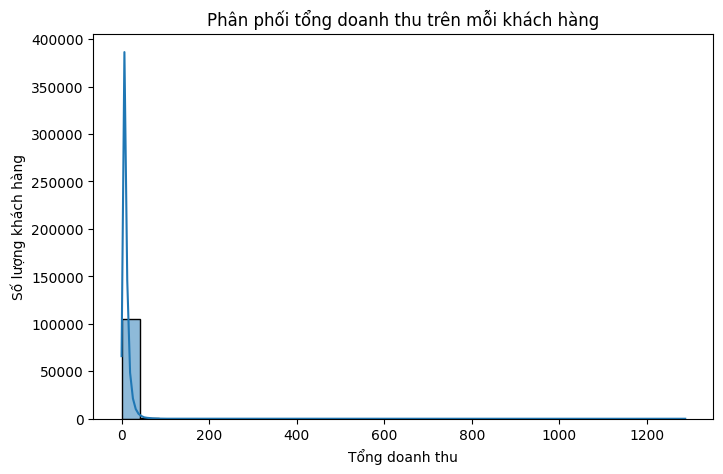

In [ ]:
# Trực quan hóa phân phối của tổng doanh thu
plt.figure(figsize=(8, 5))
sns.histplot(data=df_succcess, x='total_revenue', bins=30, kde=True)
plt.title('Phân phối tổng doanh thu trên mỗi khách hàng')
plt.xlabel('Tổng doanh thu')
plt.ylabel('Số lượng khách hàng')
plt.show()

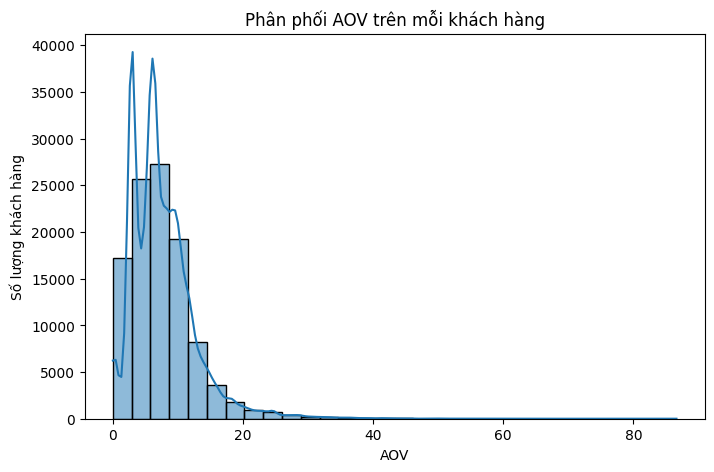

In [ ]:
# Trực quan hóa phân phối của AOV
plt.figure(figsize=(8, 5))
sns.histplot(data=df_succcess, x='aov', bins=30, kde=True)
plt.title('Phân phối AOV trên mỗi khách hàng')
plt.xlabel('AOV')
plt.ylabel('Số lượng khách hàng')
plt.show()

## 3.5 Phân tích tỉ lệ giữ chân KH (cohort analysis)

In [ ]:
from operator import attrgetter
import matplotlib.colors as mcolors

### Bước 1: Tính toán các thông tin : cohort(first_month), current_month, subsequent month

In [ ]:
df_time = df_final[(df_final['time']<'2020-01-01') & (df_final['status_id']==1) ]
df_time['first_month'] = df_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_time['current_month'] = df_time['time'].dt.to_period('M')
df_time['subsequent_month'] = (df_time['current_month'] - df_time['first_month']).apply(attrgetter('n'))

/tmp/ipython-input-1671348939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['first_month'] = df_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
/tmp/ipython-input-1671348939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['current_month'] = df_time['time'].dt.to_period('M')
/tmp/ipython-input-1671348939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df_time.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,error_group,age,month,day_name,hour,os,promotion,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,...,Unknown,36,11,Saturday,16,iOS,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,...,Unknown,39,11,Saturday,16,Android,promotion,2019-08,2019-11,3
11329,4a653fb01188cfaefe7e3731de2648de,105574,credit card,43.0,99b47df3cdeecb3dec4da6c18b916dd0,9.07,2.56,6.51,2019-11-09 18:10:13.461,1,...,Unknown,90,11,Saturday,18,iOS,promotion,2019-11,2019-11,0
11332,f075d68aa14bc424e3d9ca7904f900a5,111681,credit card,123.0,a43fb711603d5f2be7001397d280e413,8.66,2.10,6.56,2019-11-16 22:02:42.851,1,...,Unknown,55,11,Saturday,22,Other,promotion,2019-11,2019-11,0
11333,747efd023e43617ca96e127c8af625b8,116896,money in app,72.0,ac219f148fe5a9653b48ce64b41625b7,6.19,0.00,6.19,2019-11-13 17:32:32.892,1,...,Unknown,35,11,Wednesday,17,Other,non_promotion,2019-11,2019-11,0


## Bước 2: group by cohort

In [ ]:
df_cohort = df_time.groupby(['first_month','current_month','subsequent_month']).agg(total_customers=('customer_id','nunique')).reset_index()
df_cohort.head()

,first_month,current_month,subsequent_month,total_customers
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25


### Bước 3: Pivot bảng cohort

In [ ]:
df_cohort_pivot = df_cohort.pivot(index='first_month', columns='subsequent_month', values='total_customers')

In [ ]:
df_cohort_pivot

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1348.0,50.0,35.0,26.0,25.0,33.0,36.0,29.0,18.0,35.0,21.0,20.0
2019-02,1293.0,58.0,88.0,64.0,78.0,50.0,58.0,30.0,46.0,29.0,35.0,NaN
2019-03,745.0,51.0,48.0,49.0,33.0,33.0,30.0,34.0,23.0,14.0,NaN,NaN
2019-04,2922.0,101.0,103.0,87.0,92.0,66.0,96.0,63.0,42.0,NaN,NaN,NaN
2019-05,3226.0,145.0,118.0,129.0,90.0,93.0,90.0,62.0,NaN,NaN,NaN,NaN
2019-06,3062.0,131.0,151.0,98.0,133.0,114.0,63.0,NaN,NaN,NaN,NaN,NaN
2019-07,2611.0,121.0,79.0,99.0,78.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,3735.0,112.0,155.0,106.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,2169.0,117.0,67.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bước 4: Chuyển đổi sang tỷ lệ giữ chân khách hàng

In [ ]:
df_cohort_size = df_cohort_pivot.iloc[:,0]
df_cohort_size

,0
first_month,
2019-01,1348.0
2019-02,1293.0
2019-03,745.0
2019-04,2922.0
2019-05,3226.0
2019-06,3062.0
2019-07,2611.0
2019-08,3735.0
2019-09,2169.0


In [ ]:
df_cohort_retention = df_cohort_pivot.divide(df_cohort_size, axis=0)
df_cohort_retention

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bước 5: Trực quan hóa

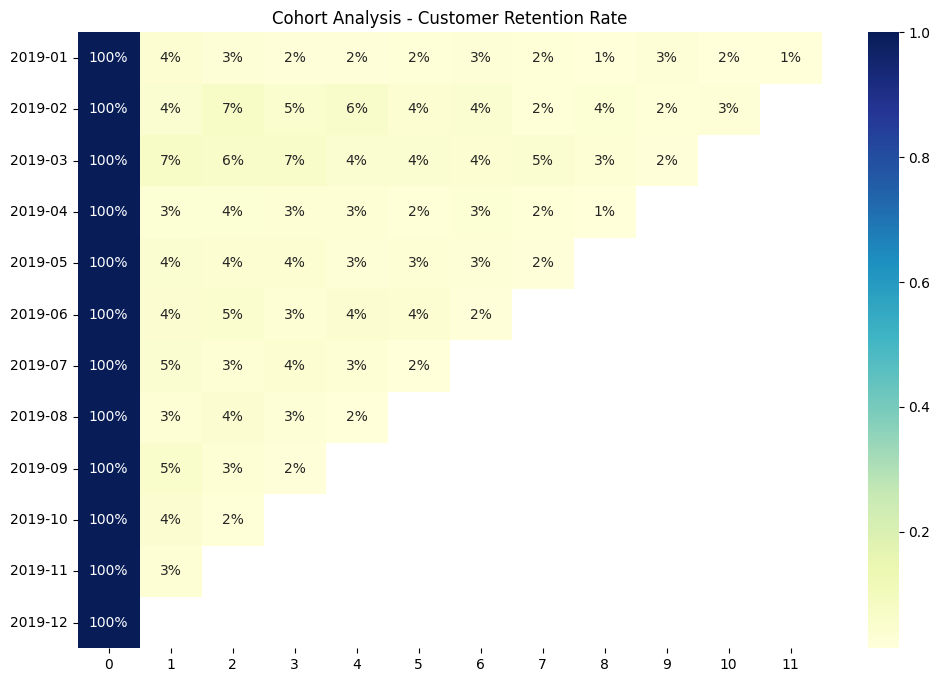

In [ ]:
# vẽ heatmap tỷ lệ giữ chân khách hàng
plt.figure(figsize=(12, 8))
sns.heatmap(df_cohort_retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Customer Retention Rate')
plt.xlabel('')
plt.ylabel('')
plt.show()

Để phân tích lý do tại sao tỷ lệ giữ chân khách hàng thấp, cần xem xét các yếu tố sau:

- Hành vi mua sắm ban đầu: Phần lớn khách hàng chỉ mua một vé. Điều này có thể chỉ ra rằng nhiều khách hàng là người dùng mới hoặc chỉ mua vé cho một sự kiện cụ thể và không có nhu cầu quay lại thường xuyên.
- Ảnh hưởng của khuyến mãi: Biểu đồ số vé bán ra theo tháng và khuyến mãi cho thấy số lượng vé có khuyến mãi luôn cao hơn đáng kể. Điều này có thể gợi ý rằng khách hàng chủ yếu bị thu hút bởi các chương trình giảm giá và ít có động lực quay lại khi không có khuyến mãi.
- Trải nghiệm người dùng: Dữ liệu hiện tại không cung cấp thông tin chi tiết về trải nghiệm người dùng trên các nền tảng đó (ví dụ: tốc độ tải trang, độ dễ sử dụng của ứng dụng, các vấn đề kỹ thuật). Trải nghiệm không tốt có thể khiến khách hàng không muốn quay lại.
- Chất lượng dịch vụ/phim: Dữ liệu không bao gồm thông tin về chất lượng phim được chiếu hoặc trải nghiệm tại rạp. Chất lượng kém có thể là lý do khiến khách hàng không hài lòng và không quay lại.
- Sự cạnh tranh: Dữ liệu hiện tại không có thông tin về các đối thủ cạnh tranh và các lựa chọn xem phim khác của khách hàng.
- Thiếu chương trình khách hàng thân thiết: Dữ liệu không đề cập đến các chương trình khách hàng thân thiết hoặc các hoạt động xây dựng cộng đồng có thể khuyến khích khách hàng quay lại.